# Visualizing the survey results with seaborn

We are finally ready to visualize the survey results with `matplotlib` and `seaborn`! Arguably the ability to make plots interactively and inline is one of the biggest advantages to using jupyter notbooks.

In [1]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
import pandas

responses = pandas.read_csv('data/tidied.csv')
responses.head()

,person,question,response_n,response
0,p0,At what kind of facilities would you like to s...,0,Libraries
1,p0,At what kind of facilities would you like to s...,1,Offices
2,p1,At what kind of facilities would you like to s...,0,Libraries
3,p1,At what kind of facilities would you like to s...,1,Bars
4,p1,At what kind of facilities would you like to s...,2,Offices


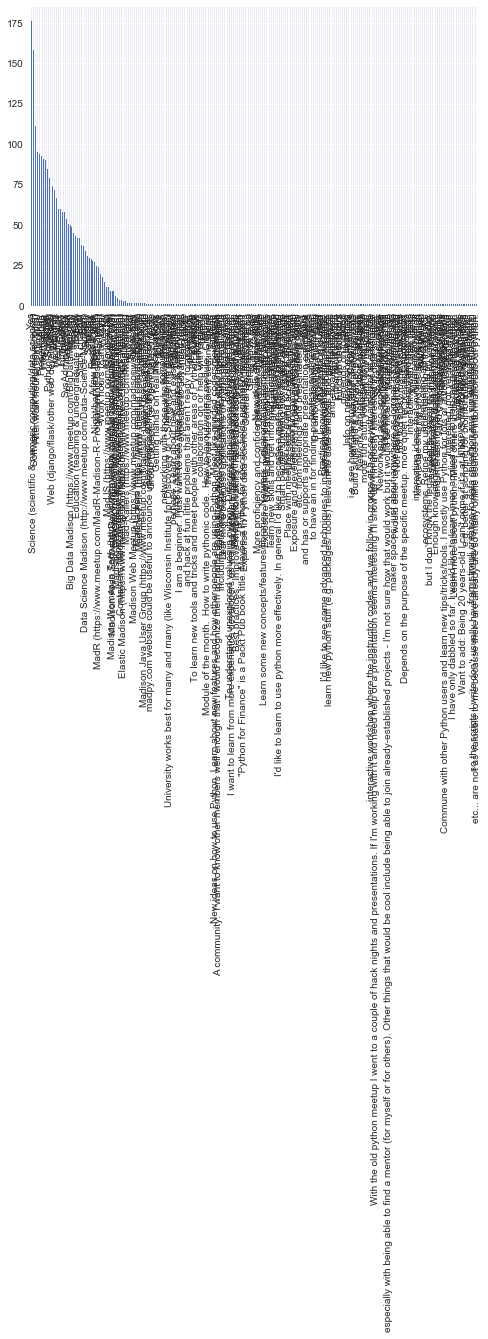

In [2]:
responses.response.value_counts().plot.bar()  # blarg!

## Merge in question information

In [3]:
import json
questions = pandas.read_csv('data/questions.csv')
questions['choices'] = questions.choices_json.apply(lambda x: json.loads(x))
del questions['choices_json']
questions.head()

,qid,question,choices
0,q0,Email address *,[]
1,q1,How are you using Python?,"[Software (engineering/developing), Science (s..."
2,q2,What kind(s) of events would you like to see a...,"[Software (engineering/developing), Science (s..."
3,q3,What format(s) of events would you like to see...,"[Presentations, Hack Nights, Python Schooling,..."
4,q4,At what skill level would you like to see even...,"[Introductory, Intermediate, Expert]"


In [4]:
survey = pandas.merge(responses, questions, how='left')
survey.set_index('qid', inplace=True)
survey.head()

,person,question,response_n,response,choices
qid,,,,,
q9,p0,At what kind of facilities would you like to s...,0,Libraries,"[Libraries, Bars, Restaurants, Offices, Other:]"
q9,p0,At what kind of facilities would you like to s...,1,Offices,"[Libraries, Bars, Restaurants, Offices, Other:]"
q9,p1,At what kind of facilities would you like to s...,0,Libraries,"[Libraries, Bars, Restaurants, Offices, Other:]"
q9,p1,At what kind of facilities would you like to s...,1,Bars,"[Libraries, Bars, Restaurants, Offices, Other:]"
q9,p1,At what kind of facilities would you like to s...,2,Offices,"[Libraries, Bars, Restaurants, Offices, Other:]"


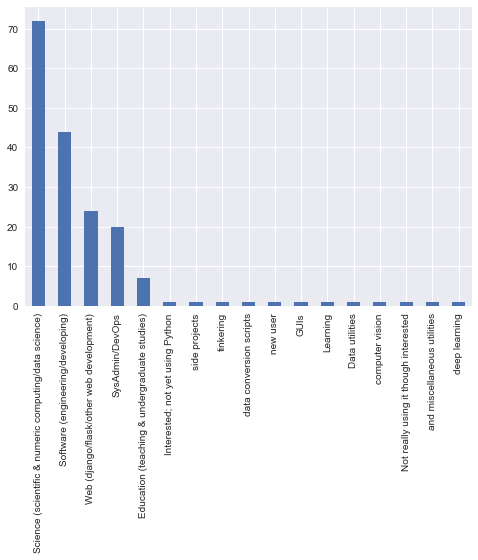

In [5]:
survey.ix['q1', 'response'].value_counts().plot.bar()

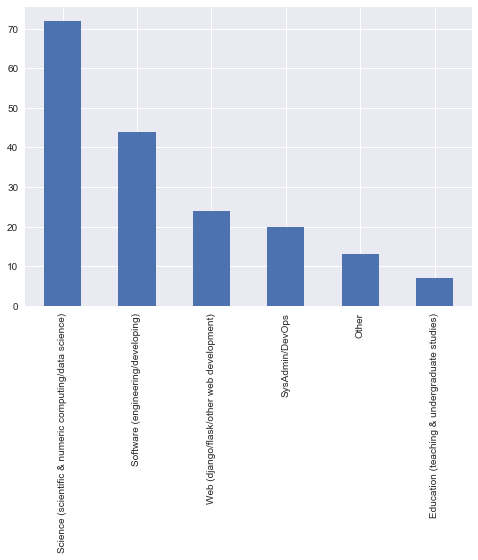

In [6]:
def label_response_type(data):
    return data.response if data.response in data.choices else 'Other'

survey['response_type'] = survey.apply(label_response_type, axis=1)
survey.ix['q1', 'response_type'].value_counts().plot.bar()

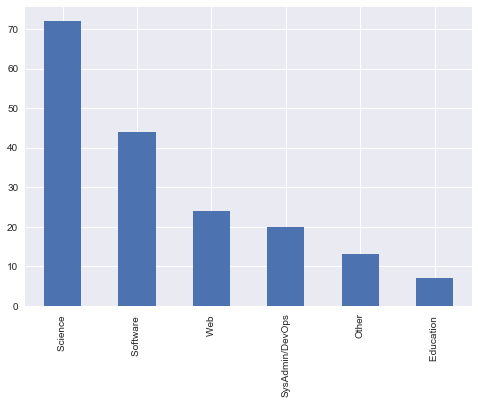

In [7]:
survey['response_label'] = survey.response_type.str.split('(').str.get(0)
survey.ix['q1', 'response_label'].value_counts().plot.bar()

# Madpy survey results

In [8]:
def countplot(qid):
    """Create pretty histograms of survey responses to a particular question."""
    ax = plt.axes()
    question_text = questions.loc[questions.qid == qid, 'question'].item()
    ax.set_title(question_text)
    seaborn.countplot(survey.ix[qid, 'response_label'], ax=ax)
    ax.figure.autofmt_xdate()

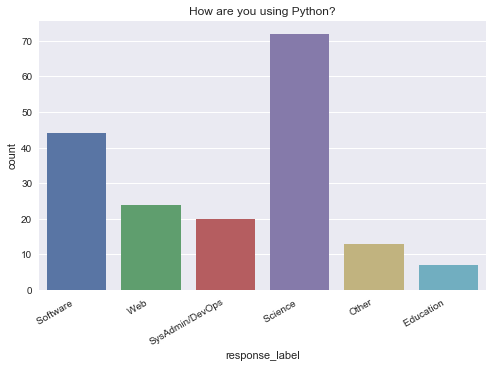

In [9]:
countplot('q1')

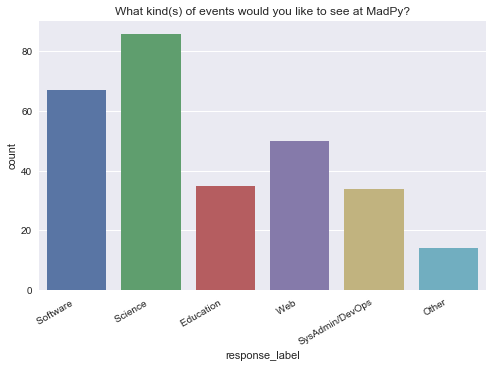

In [10]:
countplot('q2')

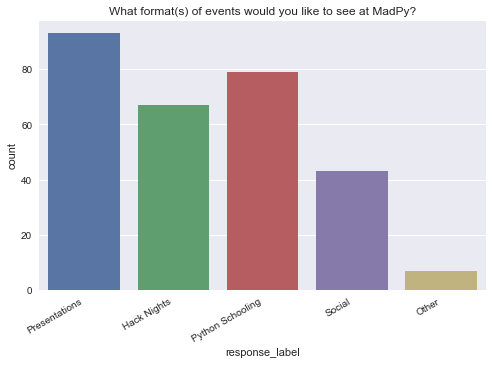

In [11]:
countplot('q3')

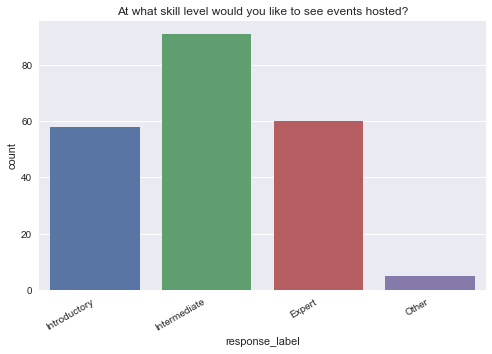

In [12]:
countplot('q4')

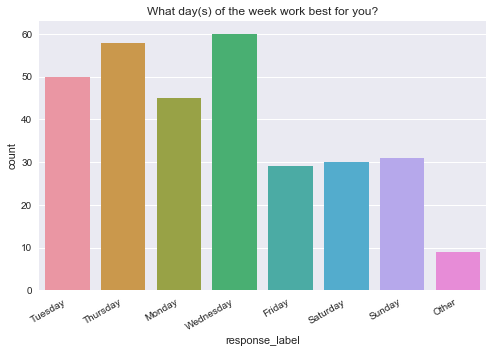

In [13]:
countplot('q5')

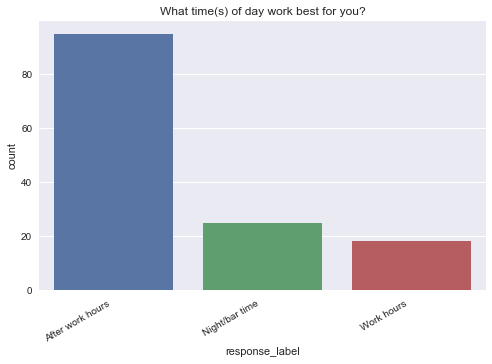

In [14]:
countplot('q6')

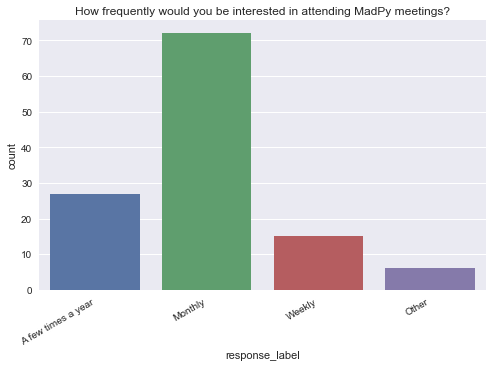

In [15]:
countplot('q7')

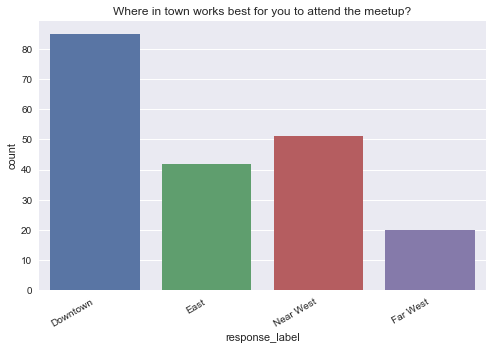

In [16]:
countplot('q8')

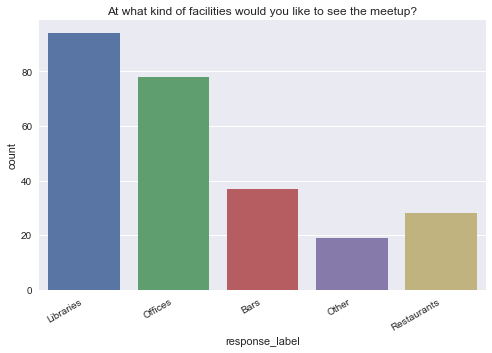

In [17]:
countplot('q9')

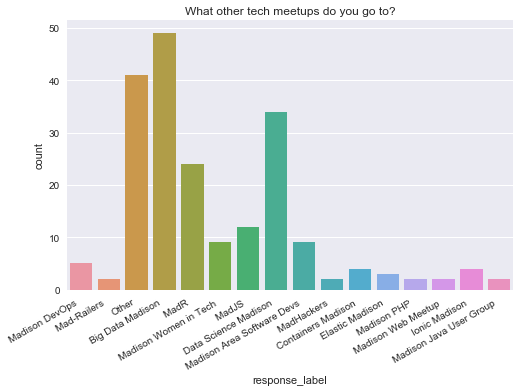

In [18]:
countplot('q10')

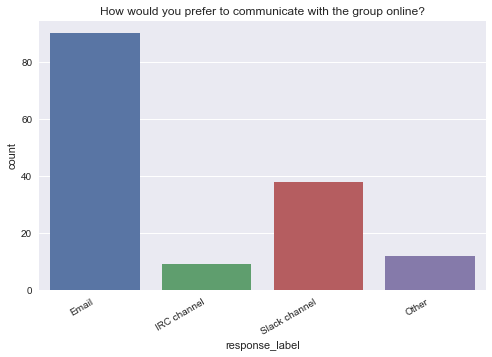

In [19]:
countplot('q11')

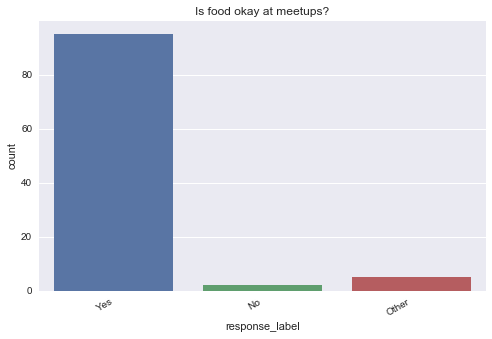

In [20]:
countplot('q12')

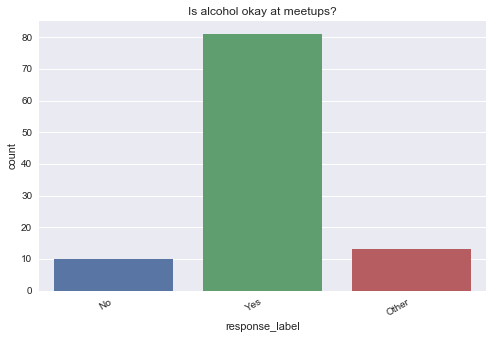

In [21]:
countplot('q13')